In [2]:
def txt_to_list(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = [line.strip().lower() for line in f.readlines()]
    return lines

word_list = txt_to_list('_data/wasnorm_wordpool.txt')


In [3]:
preamble = "Here is a list of words. After seeing this list, list all the words starting with a,b,c,d,e,f,g,h. Make sure to not reproduce any other words:"

In [4]:
import random

def subsample_words(words, n, seed=None):
    """
    Return a random subset of n unique words from the list.
    Optionally set a random seed for reproducibility.
    """
    if n > len(words):
        raise ValueError("Sample size cannot exceed number of words.")
    if seed is not None:
        random.seed(seed)
    return random.sample(words, n)

words = subsample_words(word_list, 50, seed=0)

In [5]:
interjected_words = subsample_words([word for word in word_list if word not in words], 200, seed=0)
interjection = "You will now see another list of words. Later, when reproducing the first list of words, you should not reproduce these words:"

In [6]:
cue = "Please list all words that start with the letters a,b,c,d,e,f,g,h. List these words in any order you'd like without listing any other words provided in the list. Do not think step by step, only output the list of words."

In [7]:
inp = f'{preamble} {", ".join(words)}. {interjection} {", ".join(interjected_words)}. {cue}'

In [8]:
inp = f'{preamble} {", ".join(words)}. {cue}'

In [9]:
import torch
from transformers import pipeline

model_id = "Qwen/Qwen3-4B-Instruct-2507"
# model_id = "meta-llama/Llama-3.2-3B-Instruct"
pipe = pipeline(
    "text-generation",
    model=model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)


/home/sl4742/.conda/envs/models-of-memory/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
`torch_dtype` is deprecated! Use `dtype` instead!
Loading checkpoint shards: 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]
Device set to use cuda:0


In [10]:
messages = [
    {"role": "user", "content": inp},
]
outputs = pipe(
    messages,
    max_new_tokens=256,
    temperature=0.7,
    top_p=0.8,
    top_k=20,
    min_p=0.

)
print(outputs[0]["generated_text"][-1])

{'role': 'assistant', 'content': 'bank, employee, cheek, cheddar, deodorant, earring, giraffe, hall, oatmeal, button, house, whistle, garbage, onion, igloo, roach, van, fleet, bulletin, senate, sugar, sap, chimney, scout, sister, cub, proton, pill, enemy, biologist, prince, antler, bulb'}


In [18]:
lst_words = outputs[0]["generated_text"][-1]['content'].split('— Wait')[0].split(', ')
lst_words = [w.strip() for w in lst_words]

In [37]:
print(outputs[0]["generated_text"][-1])

{'role': 'assistant', 'content': 'bank, employee, cheek, cheddar, deodorant, earring, giraffe, hall, oatmeal, button, house, whistle, garbage, onion, igloo, roach, van, fleet, bulletin, senate, sugar, sap, chimney, scout, sister, cub, proton, pill, enemy, biologist, prince, antler, bulb'}


In [19]:
lst_words

['bank',
 'employee',
 'cheek',
 'cheddar',
 'deodorant',
 'earring',
 'giraffe',
 'hall',
 'oatmeal',
 'button',
 'house',
 'whistle',
 'garbage',
 'onion',
 'igloo',
 'roach',
 'van',
 'fleet',
 'bulletin',
 'senate',
 'sugar',
 'sap',
 'chimney',
 'scout',
 'sister',
 'cub',
 'proton',
 'pill',
 'enemy',
 'biologist',
 'prince',
 'antler',
 'bulb']

In [29]:
subset_of_words = [w for w in words if w[0] in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']]

In [30]:
recall = [w in lst_words for w in subset_of_words]

In [31]:
import matplotlib.pyplot as plt

In [32]:
subset_of_words

['bank',
 'employee',
 'garbage',
 'deodorant',
 'cheddar',
 'fleet',
 'cheek',
 'bulletin',
 'earring',
 'chimney',
 'giraffe',
 'butcher',
 'boss',
 'hall',
 'button',
 'house',
 'goo',
 'cub',
 'enemy',
 'biologist',
 'antler',
 'bulb']

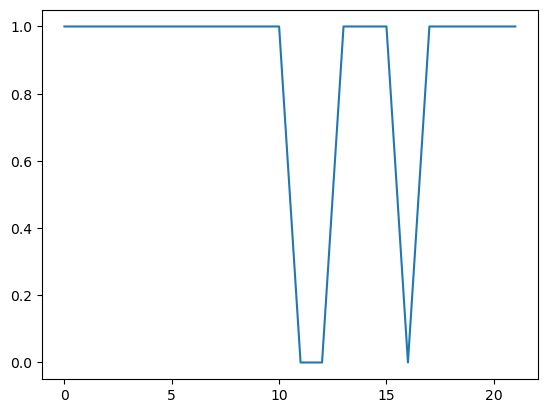

In [33]:
plt.plot(recall)

In [34]:
import numpy as np

In [35]:
precision = [w in set(subset_of_words) for w in np.unique(lst_words)]

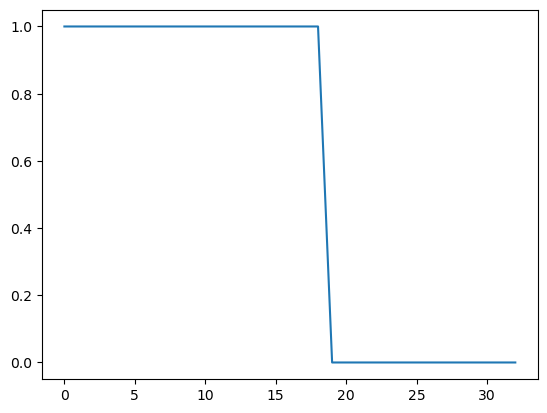

In [36]:
plt.plot(precision)